In [31]:
import torch
import matplotlib.pyplot as plt
from option import Option
from models import Generator
import sys
import numpy as np

sys.path.append(r'../')

from dataset import FashionMNIST

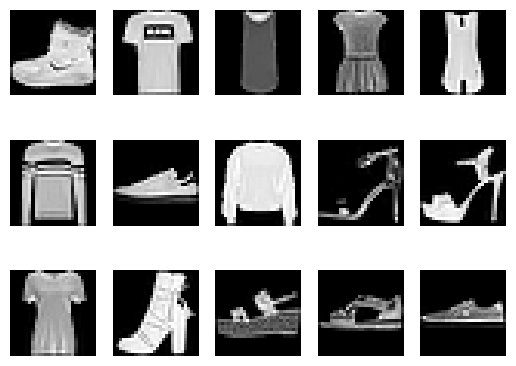

In [32]:
# Display first 6 images
dataset = FashionMNIST(dir=r"../../data")
data = dataset.get_train_dataset().data
fig, axs = plt.subplots(3, 5)
for i in range(15):
    axs[i//5, i%5].imshow(data[i].squeeze(), cmap='gray')
    axs[i//5, i%5].axis('off')
plt.show()

In [33]:
num_samples = 15

with torch.no_grad():
    opt = Option()
    generator = Generator(opt.latent_dim).to(opt.device)
    generator.load_state_dict(torch.load(opt.generator_path))
    latent = torch.randn(num_samples, opt.latent_dim).to(opt.device)
    imgs = generator(latent)

    imgs = imgs.cpu().numpy()

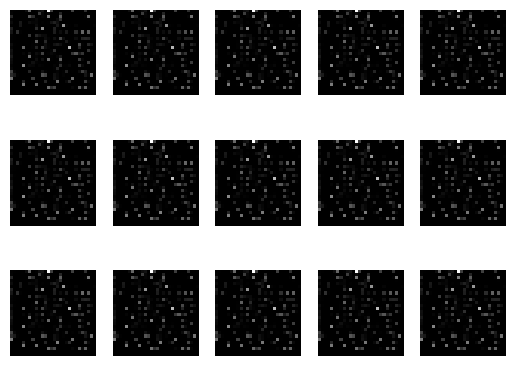

In [34]:
fig, axs = plt.subplots(3, 5)
for i in range(num_samples):
    axs[i//5, i%5].imshow(imgs[i].transpose(1, 2, 0), cmap='gray')
    axs[i//5, i%5].axis('off')
plt.show()

In [35]:
np.array_equal(imgs[3], imgs[10])

False